In [1]:
import sys
sys.path.append('../')
sys.path.append('../scripts')
import os
import pandas as pd
from scripts.data_handler import get_data
from transformers import AutoTokenizer,DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import random
from transformers import pipeline, AutoModelForSequenceClassification, DistilBertTokenizer, AdamW
from scripts.data_loader import ProductReviewDataset
import seaborn as sns
from scripts.evaluation import Evaluator
from matplotlib import pyplot as plt 



c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Comparative Analysis of Fine-Tuned DistilBERT and Pre-trained Multilingual BERT Models on Customer Review Data

100%|██████████| 63/63 [22:23<00:00, 21.33s/it]


for DistilBert Mode : loss = 0.48730809838762357 mean difference = 0.2
for Bert Mode : loss = 0.9263383367704967 mean difference = 0.539


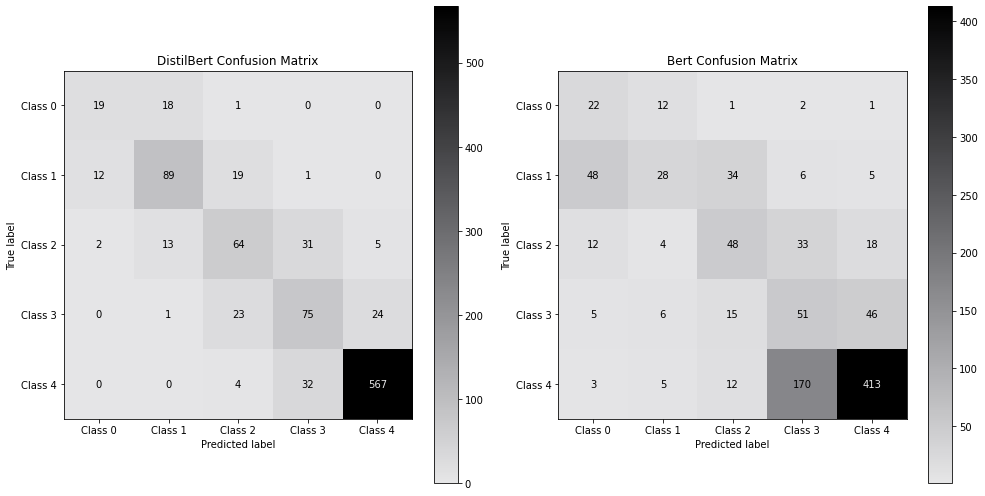

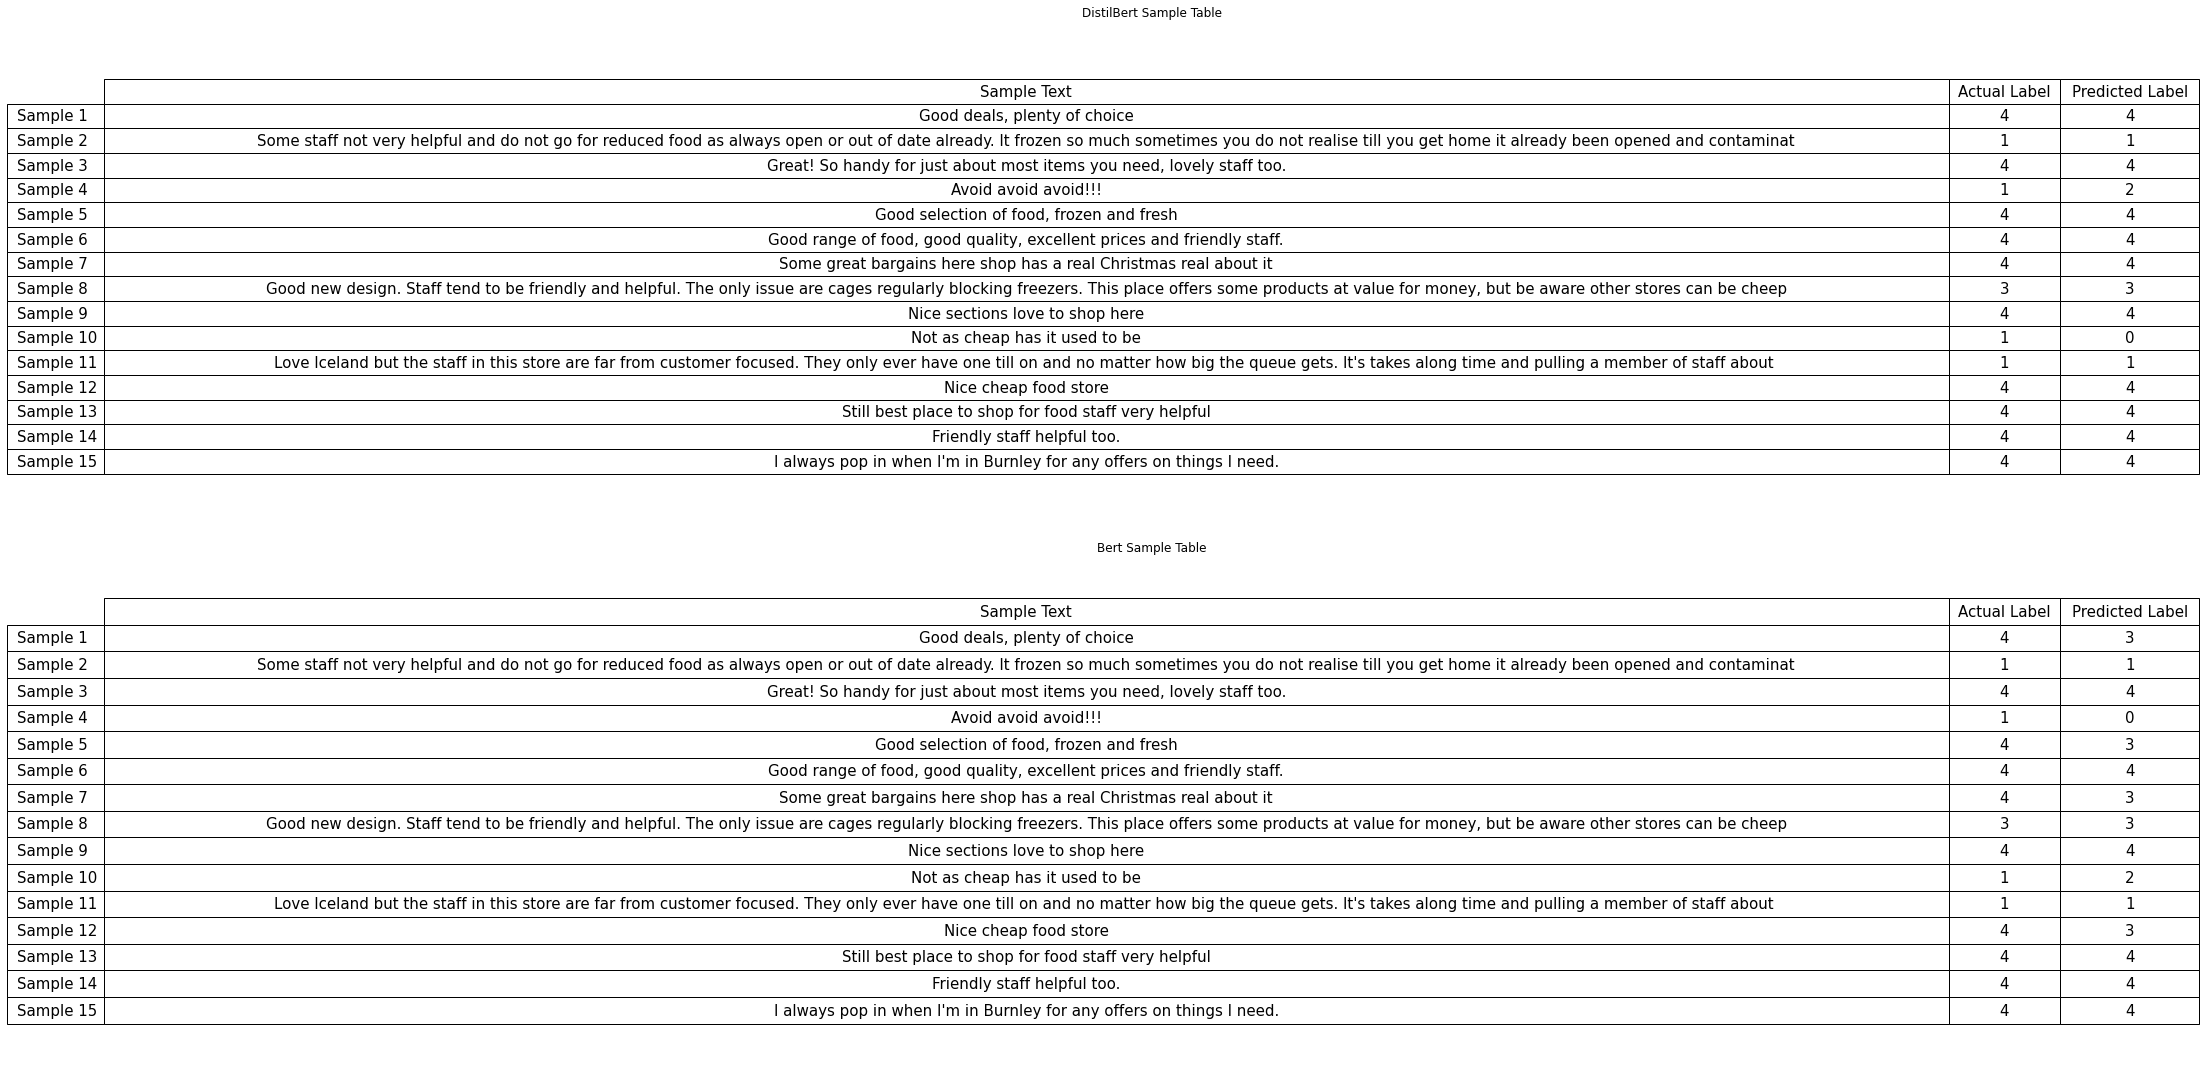

In [2]:

cache_dir_d_drive = "D:/models"
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', cache_dir=cache_dir_d_drive)
model = DistilBertForSequenceClassification.from_pretrained('../models/fine_tuned_distilbert', cache_dir=cache_dir_d_drive, num_labels = 5)
model_bert = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment' ,cache_dir=cache_dir_d_drive,  num_labels = 5)
tokenizer_bert = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment' ,cache_dir=cache_dir_d_drive)
review_texts, labels = get_data()
review_texts_train, review_texts_test, labels_train, labels_test = train_test_split(review_texts, labels, test_size=0.2, random_state=42)

train_loader, val_loader = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer)
train_loader_bert, val_loader_bert = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer_bert)
evaluator = Evaluator(model,val_loader,num_labels = 5)
evaluator.evaluate_model()
loss = evaluator.loss
mean_difference = evaluator.mean_difference

evaluator_bert = Evaluator(model_bert,val_loader_bert,num_labels = 5)
evaluator_bert.evaluate_model()
loss_bert = evaluator_bert.loss
mean_difference_bert = evaluator_bert.mean_difference
print(f"for DistilBert Mode : loss = {loss}", f"mean difference = {mean_difference}")
print(f"for Bert Mode : loss = {loss_bert}", f"mean difference = {mean_difference_bert}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
evaluator.plot_confusion_matrix(ax = axes[0])
axes[0].set_title("DistilBert Confusion Matrix")
evaluator_bert.plot_confusion_matrix(ax = axes[1])
axes[1].set_title("Bert Confusion Matrix")

plt.tight_layout()

fig2, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
num_samples = 15
sample_indices = random.sample(range(len(evaluator.all_actual_labels)), num_samples)

evaluator.display_sample_table(sample_indices, review_texts_test, ax=axes2[0])
axes2[0].set_title("DistilBert Sample Table")
evaluator_bert.display_sample_table(sample_indices, review_texts_test, ax=axes2[1])
axes2[1].set_title("Bert Sample Table")

plt.tight_layout()

plt.show()
